# Cluster analysis using k-means: Emissions/Population; WMG/GDP per capita (using MinMax for Scaling data)

# Contents

### Data cleaning
### MinMax Scaling
### Elbow technique
### k-means clustering 
### Plotting clusters 

#### Clusters for emissions / population 
#### Clusters for GDP / WMG 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'/Users/alexbor/Desktop/Data Analytics/Immersion/Submissions/6. Advanced Analytics/Project_Waste in the world'

In [4]:
#Import dataframes

df_all = pd.read_csv(os.path.join(path,'Prepared data','Complete_Dataset_without_outliers.csv'), index_col = False)


# Data cleaning 

In [5]:
df_all.shape

(4220, 13)

In [6]:
df_all.head()

,Unnamed: 0,Country,Year,Type of emissions,Gas type,"Emissions quantity, tonnes","Total population, thousands",Population density,GDP per capita,WMG,Emissions by year & country,GDP per cap. category,Country category by emissions
0,0,Aruba,2017,solid-waste-disposal,ch4,487.0,105.0,585.769,29329.0,NaN,55031.0,Upper-Middle GDP per cap.,Low emissions country
1,1,Aruba,2017,solid-waste-disposal,co2e_100yr,13636.0,105.0,585.769,29329.0,NaN,55031.0,Upper-Middle GDP per cap.,Low emissions country
2,2,Aruba,2017,solid-waste-disposal,co2e_20yr,40908.0,105.0,585.769,29329.0,NaN,55031.0,Upper-Middle GDP per cap.,Low emissions country
3,3,Aruba,2018,solid-waste-disposal,co2e_20yr,41244.0,105.0,588.675,30220.0,NaN,55483.0,Upper-Middle GDP per cap.,Low emissions country
4,16,Angola,2017,solid-waste-disposal,ch4,54100.0,30208.0,24.231,4042.0,NaN,6113300.0,Low-middle GDP per cap.,Moderate emissions country


In [7]:
#Deleting non-numerical columns
df_all = df_all.drop(columns=['Country','Year','Unnamed: 0', 'Type of emissions', 'Gas type', 'GDP per cap. category', 'Country category by emissions', 'Population density'])

In [8]:
df_all.head()

,"Emissions quantity, tonnes","Total population, thousands",GDP per capita,WMG,Emissions by year & country
0,487.0,105.0,29329.0,NaN,55031.0
1,13636.0,105.0,29329.0,NaN,55031.0
2,40908.0,105.0,29329.0,NaN,55031.0
3,41244.0,105.0,30220.0,NaN,55483.0
4,54100.0,30208.0,4042.0,NaN,6113300.0


In [9]:
df_all = df_all.drop(columns=['Emissions by year & country'])

In [10]:
df_all.head()

,"Emissions quantity, tonnes","Total population, thousands",GDP per capita,WMG
0,487.0,105.0,29329.0,NaN
1,13636.0,105.0,29329.0,NaN
2,40908.0,105.0,29329.0,NaN
3,41244.0,105.0,30220.0,NaN
4,54100.0,30208.0,4042.0,NaN


In [11]:
# Check for missing values

df_all.isnull().sum()

Emissions quantity, tonnes        0
Total population, thousands       0
GDP per capita                  294
WMG                            2759
dtype: int64

In [12]:
zero_count = (df_all['Total population, thousands'] == 0).sum()

In [13]:
zero_count

0

In [14]:
df_all.dropna(subset=['WMG'], inplace=True)


In [15]:
df_all.dropna(subset=['GDP per capita'], inplace=True)


In [16]:
df_all.isnull().sum()

Emissions quantity, tonnes     0
Total population, thousands    0
GDP per capita                 0
WMG                            0
dtype: int64

# MaxMin Scaling of data 

In [50]:
#Scaling the column 'Total population, thousands'
column_to_scale = 'Total population, thousands'

In [51]:
min_value = df_all[column_to_scale].min()


In [52]:
max_value = df_all[column_to_scale].max()


In [53]:
df_all[column_to_scale] = (df_all[column_to_scale] - min_value) / (max_value - min_value)


In [54]:
#Scaling the column Emissions quantity, tonnes
column_to_scale_1 = 'Emissions quantity, tonnes'

In [55]:
min_value_1 = df_all[column_to_scale_1].min()


In [56]:
max_value_1 = df_all[column_to_scale_1].max()


In [57]:
df_all[column_to_scale_1] = (df_all[column_to_scale_1] - min_value_1) / (max_value_1 - min_value_1)


In [58]:
#Scaling the column GDP per capita
column_to_scale_2 = 'GDP per capita'

In [59]:
min_value_2 = df_all[column_to_scale_2].min()


In [60]:
max_value_2 = df_all[column_to_scale_2].max()


In [61]:
df_all[column_to_scale_2] = (df_all[column_to_scale_2] - min_value_2) / (max_value_2 - min_value_2)


In [62]:
#Scaling the column WMG
column_to_scale_3 = 'WMG'

In [63]:
min_value_3 = df_all[column_to_scale_3].min()


In [64]:
max_value_3 = df_all[column_to_scale_3].max()


In [65]:
df_all[column_to_scale_3] = (df_all[column_to_scale_3] - min_value_3) / (max_value_3 - min_value_3)


In [66]:
#Result
df_all.head()

,"Emissions quantity, tonnes","Total population, thousands",GDP per capita,WMG
27,0.083030,0.010165,0.045717,0.134
39,0.000289,0.009986,0.031547,0.000
40,0.008478,0.009986,0.031547,0.000
41,0.025462,0.009986,0.031547,0.000
60,0.003081,0.000073,0.108602,0.751


In [67]:
#Checking for negative values
has_negatives = np.any(df_all < 0)


In [68]:
has_negatives

False

In [69]:
df_all = df_all[df_all['Total population, thousands'] != 0.0]


In [70]:
df_all = df_all[df_all['Emissions quantity, tonnes'] != 0.0]


In [71]:
df_all = df_all[df_all['GDP per capita'] != 0.0]


# Elbow technique


In [72]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [73]:
score = [kmeans[i].fit(df_all).score(df_all) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/alexbor/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/alexbor/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/alexbor/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/alexbor/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/alexb

[-243.0521440121126,
 -116.19547344912002,
 -93.714263695238,
 -73.50987458378248,
 -60.459403339368734,
 -50.466508160967386,
 -42.76544679915165,
 -39.499206970955186,
 -36.37016892503575]

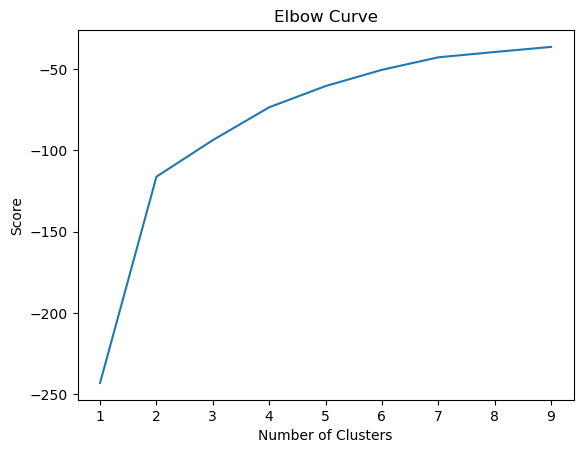

In [74]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# k-means clustering

In [75]:
kmeans = KMeans(n_clusters = 4) 

In [76]:
# Fit the k-means object to the data.

kmeans.fit(df_all)

/Users/alexbor/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [77]:
#Attaching a new column 'clusters'
df_all['clusters'] = kmeans.fit_predict(df_all)

/Users/alexbor/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [78]:
df_all.head()

,"Emissions quantity, tonnes","Total population, thousands",GDP per capita,WMG,clusters
27,0.083030,0.010165,0.045717,0.134,3
39,0.000289,0.009986,0.031547,0.000,3
40,0.008478,0.009986,0.031547,0.000,3
41,0.025462,0.009986,0.031547,0.000,3
60,0.003081,0.000073,0.108602,0.751,1


# Plotting clusters

## Clusters for emissions / population

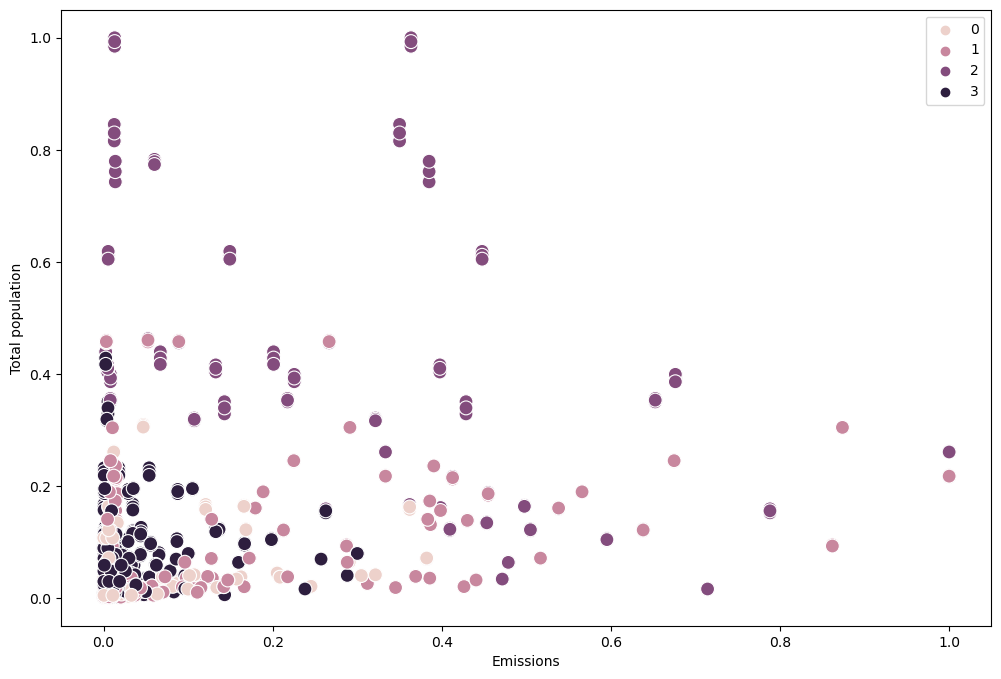

In [81]:
# Plot the clusters for the "Emissions" and "Total population" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_all['Emissions quantity, tonnes'], y=df_all['Total population, thousands'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Emissions') # Label x-axis.
plt.ylabel('Total population') # Label y-axis.
plt.show()

## Clusters for WMG / GDP per capita

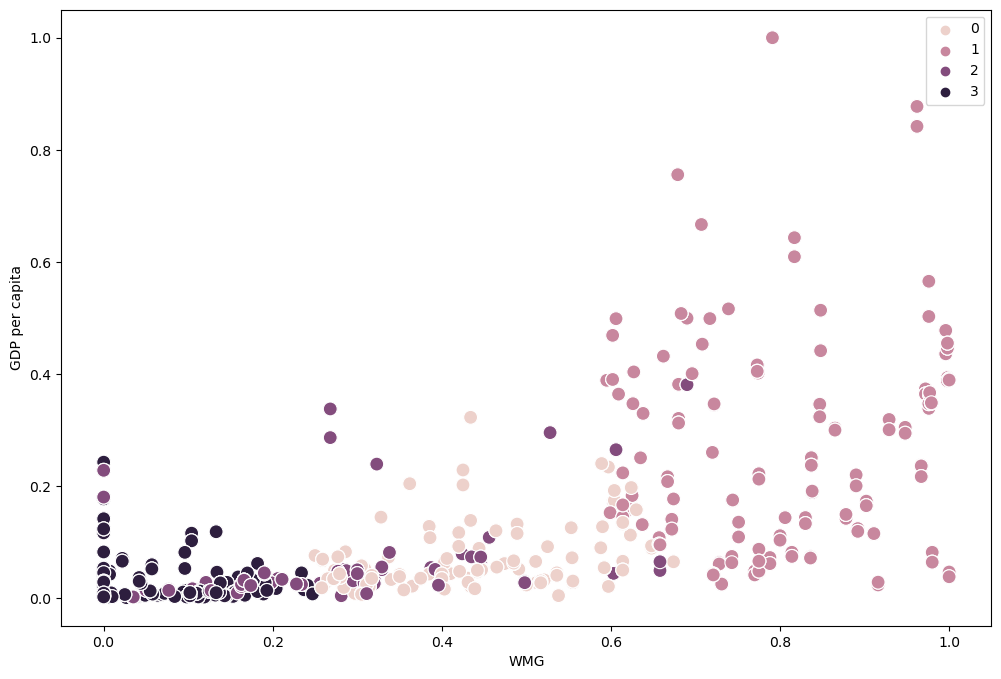

In [82]:
# Plot the clusters for the "WMG" and "GDP per capita" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_all['WMG'], y=df_all['GDP per capita'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('WMG') # Label x-axis.
plt.ylabel('GDP per capita') # Label y-axis.
plt.show()

# Extra analysis

In [83]:
#Creating flags for diffent clusters and creating a column 'cluster'

df_all.loc[df_all['clusters'] == 3, 'cluster'] = 'dark purple'
df_all.loc[df_all['clusters'] == 2, 'cluster'] = 'purple'
df_all.loc[df_all['clusters'] == 1, 'cluster'] = 'light purple'
df_all.loc[df_all['clusters'] == 0, 'cluster'] = 'pink'


In [84]:
#grouping by 'cluster' colors and calculating statistics

df_all.groupby('cluster').agg({'Emissions quantity, tonnes':['mean', 'median'], 
                         'Total population, thousands':['mean', 'median'], 
                          'GDP per capita':['mean', 'median'],
                          'WMG':['mean', 'median']})

Emissions quantity, tonnes           Total population, thousands  \
                                   mean    median                        mean   
cluster                                                                         
dark purple                    0.027146  0.008240                    0.052731   
light purple                   0.120712  0.023605                    0.072008   
pink                           0.044744  0.008484                    0.039151   
purple                         0.333082  0.349991                    0.397477   

                       GDP per capita                 WMG         
                median           mean    median      mean median  
cluster                                                           
dark purple   0.029856       0.023374  0.010049  0.055147  0.010  
light purple  0.025504       0.275348  0.236635  0.808984  0.800  
pink          0.020169       0.072089  0.049337  0.433272  0.425  
purple        0.355874       0.046070  0.024661  0.222785  0.198

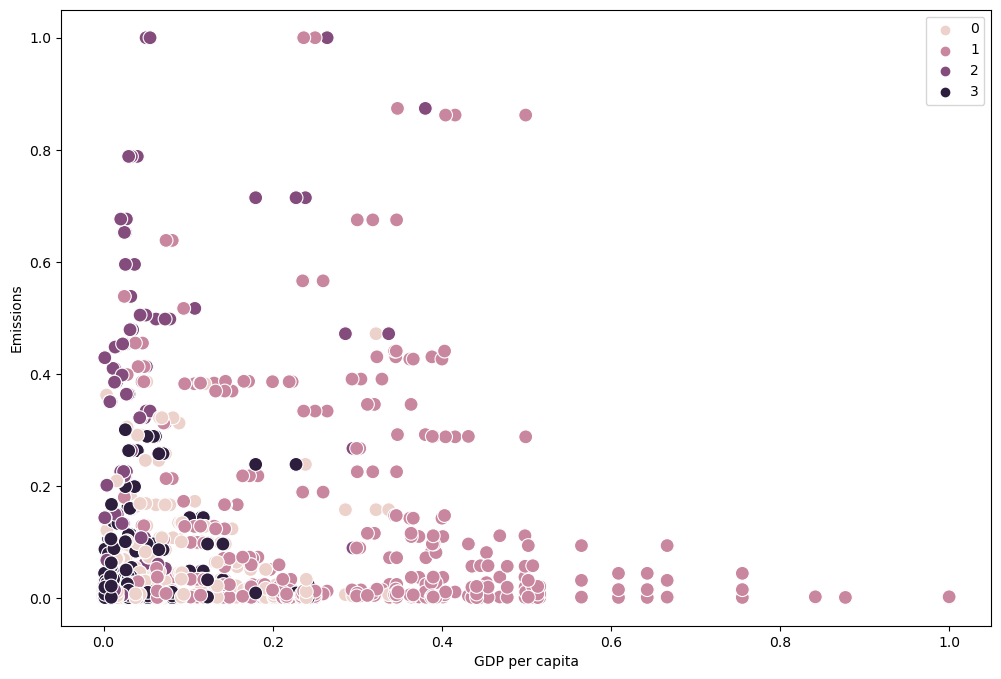

In [85]:
# Plot the clusters for the "GDP per capita" and "Emissions" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_all['GDP per capita'], y=df_all['Emissions quantity, tonnes'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('GDP per capita') # Label x-axis.
plt.ylabel('Emissions') # Label y-axis.
plt.show()

In [86]:
df_all.to_csv(os.path.join(path, 'Prepared Data', 'Clusters_UPD.csv'))